# Data Challenge 8 — Introduction to Multiple Linear Regression (MLR)


**Format:** Instructor Guidance → You Do (Students) → We Share (Reflection)


**Goal:** Build an **MLR** model using **2–3 predictors** to predict one numeric target. Evaluate with a **train–test split** (MAE/RMSE), interpret **coefficients while holding others constant**, and compare against an **SLR baseline**.


> Dataset: **NYC Yellow Taxi — Dec 2023** (CSV). Keep code *simple*: light numeric coercion only for your chosen columns.

## Instructor Guidance

**Docs (quick links):**
- Train/Test Split — scikit‑learn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- MAE / MSE / RMSE — scikit‑learn: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
- OLS (fit/predict/residuals) — statsmodels: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html
- OLS Results (`resid`, `fittedvalues`, `summary`) — statsmodels: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html
- Q–Q plot — SciPy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html


### Pseudocode Plan (for **MLR**)
1) **Load CSV** → preview columns/shape.
2) **Assign Y and Xs (2–3 predictors)** → pick numeric columns that matter; if needed, coerce **just** these to numeric and drop NAs.
3) **Add intercept** → `X = add_constant(X_matrix)`.
4) **Train–test split (80/20)** → `X_train, X_test, y_train, y_test = train_test_split(...)` (set `random_state`).
5) **Fit on TRAIN** → `model = OLS(y_train, X_train).fit()`.
6) **Predict on TEST** → `y_pred = model.predict(X_test)`.
7) **Evaluate on TEST** → compute **MAE** and **RMSE** using `y_test` & `y_pred`; speak in **units of Y**.
8) **Diagnostics on TRAIN** → use `model.resid` & `model.fittedvalues` for residuals vs fitted; Q–Q plot; check Durbin–Watson in `model.summary()`.
9) **Bias–variance read (optional)** → compare train vs test errors.
10) **Stakeholder one‑liner** → MAE/RMSE in units + brief reliability note. *(Optional)* Contrast with an **SLR baseline** using the strongest single predictor.

## You Do — Student Section
Work in pairs. Keep code simple and comment your choices.

### Step 0 — Setup & Imports

In [1]:
import pandas as pd, numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import scipy.stats as stats
from pathlib import Path
pd.set_option('display.float_format', lambda x: f'{x:,.4f}')

### Step 1 — Load CSV & Preview
- Point to your **Dec 2023** taxi CSV.
- Print **shape** and **columns**.

**Hint: You may have to drop missing values and do a force coercion to make sure the variables stay numeric (other coding assignments may help)**

In [2]:
path = '/Users/Marcy_Student/Desktop/Marcy-Modules/marcy-git/DA2025_Lectures/Mod6/data/2023_Yellow_Taxi_Trip_Data_20251015.csv'
df = pd.read_csv(path)
df

/var/folders/gs/yv3dj4zx2tgdd5tw701ypspm0000gp/T/ipykernel_2159/2708860169.py:2: DtypeWarning: Columns (4,10,13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,12/01/2023 04:11:39 PM,12/01/2023 04:19:13 PM,2.0000,0.69,1.0000,N,141,140,1,7.9000,2.5000,0.5000,3.0000,0.0000,1.0000,17.4000,2.5000,0.0000
1,1,12/01/2023 04:11:39 PM,12/01/2023 04:20:41 PM,3.0000,1.1,1.0000,N,236,263,2,10.0000,5.0000,0.5000,0.0000,0.0000,1.0000,16.5000,2.5000,0.0000
2,2,12/01/2023 04:11:39 PM,12/01/2023 04:20:38 PM,1.0000,1.57,1.0000,N,48,239,4,-10.7000,-2.5000,-0.5000,0.0000,0.0000,-1.0000,-17.2000,-2.5000,0.0000
3,2,12/01/2023 04:11:39 PM,12/01/2023 04:20:38 PM,1.0000,1.57,1.0000,N,48,239,4,10.7000,2.5000,0.5000,0.0000,0.0000,1.0000,17.2000,2.5000,0.0000
4,1,12/01/2023 04:11:39 PM,12/01/2023 04:34:39 PM,2.0000,3,1.0000,N,164,211,1,21.9000,5.0000,0.5000,3.0000,0.0000,1.0000,31.4000,2.5000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3310902,2,01/01/2024 12:01:58 AM,01/01/2024 12:10:04 AM,3.0000,1.7000,1.0000,N,234,144,1,10.7000,1.0000,0.5000,2.3600,0.0000,1.0000,18.0600,2.5000,0.0000
3310903,2,01/03/2024 10:00:04 AM,01/03/2024 11:08:22 AM,1.0000,21.6000,1.0000,N,132,136,1,82.1000,0.0000,0.5000,18.4600,6.9400,1.0000,110.7500,0.0000,1.7500
3310904,2,01/03/2024 05:00:52 PM,01/03/2024 05:01:05 PM,2.0000,0.0000,5.0000,N,265,265,1,120.0000,0.0000,0.0000,0.0000,0.0000,1.0000,121.0000,0.0000,0.0000
3310905,2,01/03/2024 06:43:26 PM,01/03/2024 06:43:29 PM,2.0000,0.0100,5.0000,N,95,95,1,86.6900,0.0000,0.0000,17.5400,0.0000,1.0000,105.2300,0.0000,0.0000


In [3]:
# Coerce fare, tip, distance to numeric safely
num_cols = ['fare_amount', 'tip_amount', 'trip_distance', 'passenger_count']
for c in num_cols:
    df[c] = pd.to_numeric(
        df[c].astype(str).str.strip().str.replace(r'[^0-9.+\-eE]', '', regex=True),
        errors='coerce'
)

In [4]:
# hour / min column
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_min'] = df['tpep_pickup_datetime'].dt.minute
df['dropoff_min'] = df['tpep_dropoff_datetime'].dt.minute
df['trip_duration'] = df['dropoff_min'] - df['pickup_min']

/var/folders/gs/yv3dj4zx2tgdd5tw701ypspm0000gp/T/ipykernel_2159/3659540758.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
/var/folders/gs/yv3dj4zx2tgdd5tw701ypspm0000gp/T/ipykernel_2159/3659540758.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


In [5]:
# Clean data some and add a new column called 'tip_pct' as the target 
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 1000) & (df['tip_amount'] >= 0) & (df['trip_distance'] > 0) & (df['trip_distance'] < 200) & (df['trip_duration'] > 0) & (df['passenger_count'] > 0)]
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=num_cols)
df['tip_pct'] = (df['tip_amount']/df['fare_amount']).clip(0,1)



### Notes on EDA:

- fare_amount: 0 < x < 1000

    - This range gets rid of negative (impossible) values and most outliers. $1000 fare could still be an outlier, but let's include it bc there's still possibilities there (it is NYC after all).

- trip_distance: 0 < x < 2000
    - getting rid of (impossible) negative distance values. Also filtering for anything less than 2000, which gets rid of very high outliers.

- trip_duration: > 0
    - gets rid of (impossible) negative values

- passenger_count: > 0
    - gets rid of (impossible) negative values

In [6]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                     object
congestion_surcharge            float64
airport_fee                     float64
hour                              int32
pickup_min                        int32
dropoff_min                       int32
trip_duration                     int32
tip_pct                         float64
dtype: object

### Step 2 —  Pick Target **Y** and Predictors **Xs** (choose 2–3 numeric)

- **Avoid** using an X that directly defines Y (e.g., `total_amount` when Y = `fare_amount`).
- Coerce **only these columns** to numeric; drop NA rows.

In [7]:
y = df['fare_amount']

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

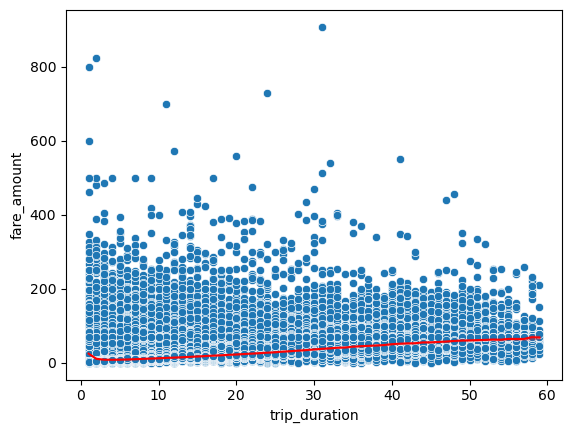

In [9]:
# scatter between trip_duration (mins) and fare_amount
sns.scatterplot(df, x='trip_duration', y='fare_amount')
sns.lineplot(df, x='trip_duration', y='fare_amount', color='red')
plt.show()

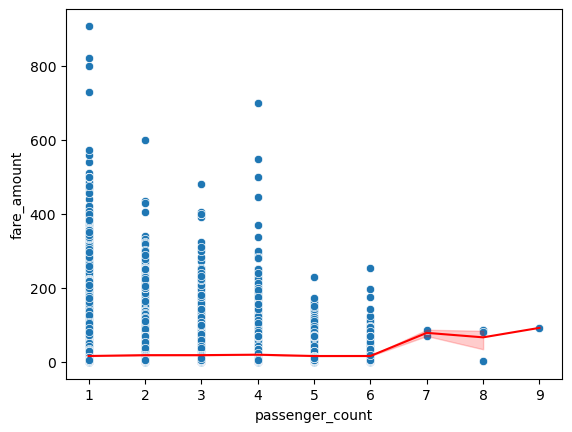

In [10]:
sns.scatterplot(df, x='passenger_count', y='fare_amount')
sns.lineplot(df, x='passenger_count', y='fare_amount', color='red')
plt.show()

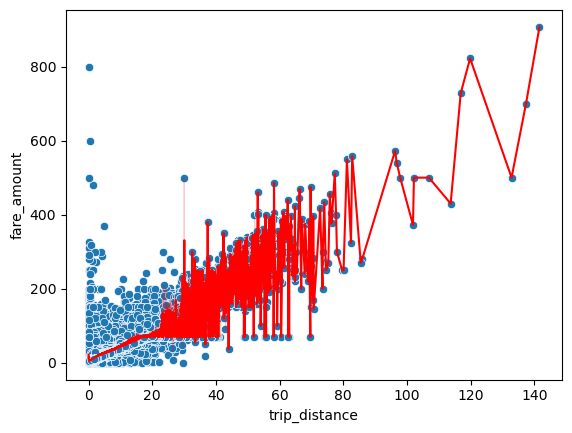

In [11]:
sns.scatterplot(df, x='trip_distance', y='fare_amount')
sns.lineplot(df, x='trip_distance', y='fare_amount', color='red')
plt.show()

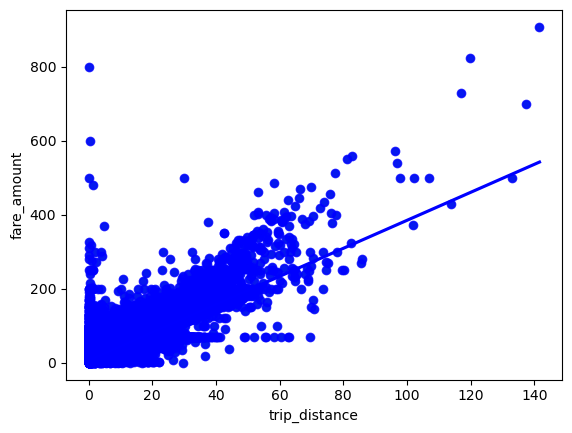

In [12]:
sns.scatterplot(df, x='trip_distance', y='fare_amount')
sns.regplot(df, x='trip_distance', y='fare_amount', color='blue')
plt.show()

### Step 3 —  Design Matrix (add intercept) & Train–Test Split (80/20)

- Add intercept with `sm.add_constant`.
- Use a **random_state** for reproducibility.
- (Optional) Discuss when a **time‑aware** split is better.

In [13]:
# adding constant
X = sm.add_constant(df[['trip_duration', 'trip_distance']])
# train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# readding intercept to train-test
x_train_const = sm.add_constant(x_train)
x_test_const = sm.add_constant(x_test)

### Step 4 — Fit MLR on TRAIN & Interpret Coefficients (holding others constant)

- Print the **coefficient table**.
- Write **one unit‑based sentence per coefficient** using “**holding others constant**.”

In [14]:
# fitting into model (training)
model = sm.OLS(y_train, x_train_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                 7.074e+06
Date:                Wed, 05 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:28:52   Log-Likelihood:            -5.3108e+06
No. Observations:             1763415   AIC:                         1.062e+07
Df Residuals:                 1763412   BIC:                         1.062e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.2367      0.007    481.086      0.000       3.223       3.250
trip_duration     0.3348      0.000    675.220      0.000       0.334       0.336
trip_distance     3.3668      0.001   2825.651      0.000       3.364       3.369
==============================================================================
Omnibus:                  3622451.685   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      76273344351.297
Skew:                          16.588   Prob(JB):                         0.00
Kurtosis:                    1021.320   Cond. No.                         29.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## So...

- We have a high R-squared = Adj. R-squared, but this would make sense because, logically, trip_duration and trip_distance are very strong indicators of fare_amount.
    - We also have low p-values.

- Our const coef tells us that when both variables = 0, our fare_amount would be ~$3.24. This intercept doesn't really make sense in real life, but it's still good to know.

- our variable coefficients tell us:
    - trip_duration: every minute increases fare_amount by ~$0.33.
    - trip_distance: every mile increases fare_amount by ~$3.37.

In [15]:
# quick check: correlation between variables

corr = df['trip_duration'].corr(df['trip_distance'])
print(f'Correlation: {corr}')
print("It's moderately correlated. I would consider it a red flag if it was > 0.75, so I will continue to work with it.")

Correlation: 0.5148953918336501
It's moderately correlated. I would consider it a red flag if it was > 0.75, so I will continue to work with it.


*Template (edit to your variables & units):*
- **β_intercept (const):** Baseline Y when all predictors are 0 (may be a math anchor).
- **β_X1:** Holding other predictors constant, +1 unit in **X1** is associated with **+β_X1** units in **Y**.
- **β_X2:** Holding other predictors constant, +1 unit in **X2** is associated with **+β_X2** units in **Y**.
- *(If 3rd predictor)* **β_X3:** …
- **Significance:** Note **p‑values** and **95% CIs** (from statsmodels summary) if relevant.

### Step 5 — Evaluate on **Unseen Test Data** (MAE/RMSE in units of Y)
Compute MAE and RMSE and write a one‑sentence **stakeholder** readout.

In [ ]:
# predictions
y_pred = model.predict(x_test)

# using this and y-test for MAE / RMSE
evaluation = mean_absolute_error(y_test, y_pred)
print(f'MAE = ${evaluation} --> Pretty good!')

eval2 = mean_squared_error(x_test, y_pred)

MAE = $1.740190982822355 --> Pretty good!


NameError: name 'r' is not defined

### Step 6 — (Optional) Compare to an SLR Baseline
- Fit **SLR** using your strongest single predictor (e.g., `trip_distance`).
- Compare **MAE/RMSE** to your **MLR**; explain why MLR helped (or didn’t).

In [ ]:
None

### Step 7 — Quick Diagnostics (Train Residuals)
- **Residuals vs Fitted:** random cloud ≈ good; cones/funnels suggest non‑constant variance.
- **Q–Q plot:** points roughly along diagonal (normality for inference).
- **Durbin–Watson:** printed in `model.summary()` (~2 suggests independence).

In [ ]:
None

## We Share — Reflection & Wrap‑Up
Write **2 short paragraphs** and be specific:


1) **Which model would you trust today—MLR or SLR—and why?**
Use **test MAE/RMSE (units)**, coefficient interpretations (holding others constant), and any residual/correlation observations.


2) **What’s next to improve reliability?**
Options: add a more relevant predictor, use a **time‑aware split**, segment by ride type (airport vs. city), or prepare for **VIF/regularization** to handle collinearity.